<a href="https://colab.research.google.com/github/Shivam10816/CS22M082_ASSIGNEMNT_1/blob/main/Copy_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wandb
import wandb
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=ad32b76241db2be360281232b42cc83a4af20f6d481a8b9ad93dcb3f951004a0
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
4422102/4422102 [==============================] - 0s 0us/step


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


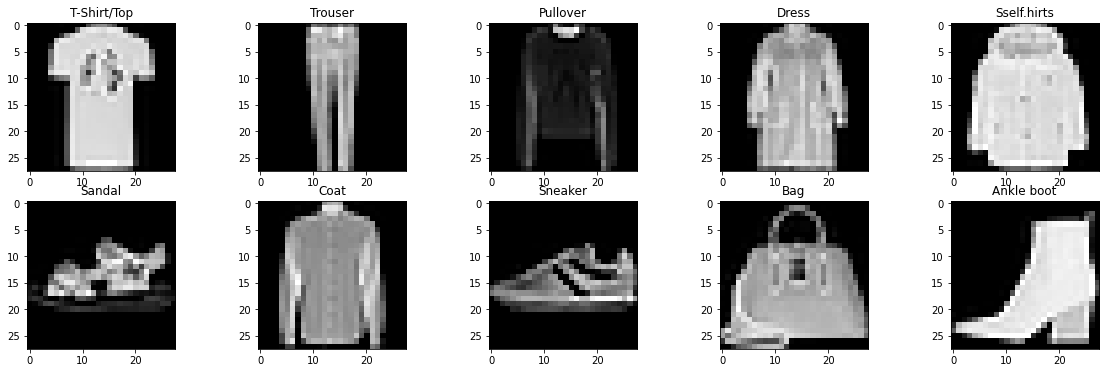

In [ ]:
wandb.init(project = "Assignment 1" ,name = "Question 1")


titles = ["T-Shirt/Top","Trouser","Pullover","Dress","Sself.hirts","Sandal","Coat","Sneaker","Bag","Ankle boot"]
fig,axs = plt.subplots(2,5,figsize=(20,6))
axs =axs.flatten()
images=[]
for i in range(0,10):
  index =random.choice(np.where(train_labels==i)[0])
  
  axs[i].imshow(train_data[index],cmap="gray")
  axs[i].set_title(titles[i])
  Img = wandb.Image(train_data[index],caption=[titles[i]])
  images.append(Img)
wandb.log({"examples":images})
  

In [ ]:

train_data = np.reshape(train_data,(len(train_data),train_data.shape[1]**2))
test_data = np.reshape(test_data,(len(test_data),test_data.shape[1]**2))
test_labels =np.reshape(test_labels,(1,len(test_data)))


# **Question 2/3**

In [3]:
import torch.nn.init as init
import torch
from numpy.core.multiarray import MAY_SHARE_EXACT
from re import M
from matplotlib.lines import STEP_LOOKUP_MAP


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = np.reshape(train_data/255.0,(len(train_data),train_data.shape[1]**2))
test_data = np.reshape(test_data/255.0,(len(test_data),test_data.shape[1]**2))
test_labels =np.reshape(test_labels,(1,len(test_data)))


class neural_network:

  #it initializes W and b
  def __init__(self):
    
    (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
    train_data = np.reshape(train_data/255.0,(len(train_data),train_data.shape[1]**2))
    self.test_data = np.reshape(test_data/255.0,(len(test_data),test_data.shape[1]**2))
    self.test_labels =np.reshape(test_labels,(1,len(test_data)))

    l=int(train_data.shape[0]/100)*80
    self.train_data=train_data[0:l]
    self.train_label=train_labels[0:l]
    self.validation_data = train_data[l:]
    self.validation_label = train_labels[l:]
    
  #def train(self,epoch=10,hidden_layers=3,size_of_layer=32,weight_decay=0,learning_rate=0.01,optimizer="sgd",batch_size=32,weight_init="random",activation="sigmoid"):

  def train(self,weight_init="random",hidden_layers=3,size_of_layer=32,activation="sigmoid",optimizer="sgd",learning_rate=0.01,epoch=10,batch_size=32,weight_decay=0):
    
    np.random.seed(42)
    
    self.hi=[size_of_layer]*hidden_layers
    self.activation =activation
    if(weight_init=="Xavier"):
      self.xav()
    elif(weight_init=="random"):
      self.rndm()
   
    if(optimizer=="sgd"):
      self.sgd(step_size=learning_rate,batch_size =batch_size,epoch=epoch,reg=weight_decay)
    elif(optimizer=="momentum"):
      self.mbgd(step_size=learning_rate,batch_size =batch_size,epoch=epoch,beta=0.75,reg=weight_decay)
    elif(optimizer=="nesterov"):
      self.nagd(step_size=learning_rate,batch_size =batch_size,epoch=epoch,reg=weight_decay)
    elif(optimizer=="rmsprop"):
      self.rmsprop(step_size=learning_rate,batch_size =batch_size,epoch=epoch,reg=weight_decay)
    elif(optimizer=="adam"):
      self.adam(step_size=learning_rate,batch_size =batch_size,epoch=epoch,reg=weight_decay)
    elif(optimizer=="nadam"):
      self.nadam(step_size=learning_rate,batch_size =batch_size,epoch=epoch,reg=weight_decay)
    
    


    


  def xav(self):
    l= self.train_data.shape[1]

    self.W =[self.xavier_init(self.hi[0],l)] 
    self.b =[self.xavier_init(1,self.hi[0])]
    for i in range(1,len(self.hi)) :
      self.W.append(self.xavier_init(self.hi[i],self.hi[i-1]))
      self.b.append(self.xavier_init(1,self.hi[i])) 
    self.W.append(self.xavier_init(10,self.hi[-1]))
    
    self.b.append(self.xavier_init(1,10))
  

  def rndm(self):
    l= train_data.shape[1]

    self.W =[np.random.randn(self.hi[0],l)] 
    self.b =[np.random.randn(1,self.hi[0])]
    for i in range(1,len(self.hi)) :
      self.W.append(np.random.randn(self.hi[i],self.hi[i-1]))
      self.b.append(np.random.randn(1,self.hi[i])) 
    self.W.append(np.random.randn(10,self.hi[-1]))
    
    self.b.append(np.random.randn(1,10))

  def relu(self,matrix):

    """
    Arguments:
    matrix -- a NumPy array or matrix
    Returns:
    A NumPy array or matrix of the same shape as the input matrix,
    with ReLU applied to each element.
    """
    return np.maximum(matrix, 0) 

  def relu_derivative(self,matrix):
    
    # Create a copy of the input matrix and convert to float
    derivative = np.array(matrix, dtype=np.float64)
    
    # Set negative values to 0
    derivative[derivative < 0] = 0
    
    # Set positive values to 1
    derivative[derivative > 0] = 1

    return derivative

  def tanh(self,matrix):
    
    # Avoid overflow by scaling inputs to the range [-100, 100]
    x = np.clip(matrix, -100, 100)
    
    # Apply tanh element-wise
    return np.tanh(x)

  def tanh_derivative(self,matrix):
   
    # Avoid overflow by scaling inputs to the range [-100, 100]
    x = np.clip(matrix, -100, 100)
    
    # Compute tanh element-wise
    tanh_x = np.tanh(x)
    
    # Compute derivative of tanh element-wise
    derivative = 1 - tanh_x**2
    
    
    
    return derivative

 
  def WX_plus_B(self,W, X, b):
    
    result = np.dot(X, W.transpose())
    row_count = result.shape[0]
    
    row_matrix_repeated = np.tile(b, (row_count, 1))
    return result + row_matrix_repeated


  def xavier_init(self,n, m):
    # Calculate the Xavier initialization scale factor
    xavier_scale = np.sqrt(2.0 / (n + m))

    # Use numpy's random function to generate a matrix of shape (n, m)
    matrix = np.random.randn(n, m) * xavier_scale

    return matrix

  #calculates sigmoid for matrix
  def sigmoid(self,x):
  
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
  
  def sum_columns(self,matrix):
    if isinstance(matrix, np.ndarray):
        # if matrix is a numpy array, convert it to a list
        matrix = matrix.tolist()
    
    # sum the elements of each column and store in a list
    column_sums = [sum(col) for col in zip(*matrix)]
    
    # convert the list to a 2D matrix of shape (1 x n)
    row_matrix = np.array([column_sums])
    
    return row_matrix
  #softmax for matrix
  def softmax(self,x):
    # Subtract the maximum value in each row from all the values in that row
    # to prevent numerical instability from very large or very small values
    # in the exponentials of the softmax function.
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)
  
  def subtract_matrices(self,W, W_theta, step_size):
    """
    Subtract the matrices in the second list from the matrices in the first list, after multiplying the matrices in the
    second list by a step size.

    Args:
        first_list (list): A list of numpy arrays representing the first set of matrices.
        second_list (list): A list of numpy arrays representing the second set of matrices.
        step_size (float): The step size to multiply the second set of matrices by.

    Returns:
        list: A list of numpy arrays representing the result of subtracting the second set of matrices from the first set
        of matrices after multiplying the second set of matrices by the step size.
    """
    result_list = []
    for i in range(len(self.W)):
        result = W[i] - step_size * (W_theta[i])
        result_list.append(result)
    return result_list

  def sigmoid_derivative(self,matrix):
    """
    Calculate the derivative of the sigmoid function on a 2D matrix.

    Args:
        matrix (numpy.ndarray): A numpy array representing the matrix.

    Returns:
        numpy.ndarray: A numpy array representing the result of calculating the sigmoid derivative on the matrix.
    """
    shift = np.max(matrix, axis=1, keepdims=True)
    exp_matrix = np.exp(matrix - shift)
    sig = 1 / (1 + exp_matrix)
    return sig * (1 - sig)

  def forward_pro(self,X,W,b):
    A=[]
    H=[]
    A.append(self.WX_plus_B(W[0],X,b[0])) # a0 = WoX +bo

    for i in range(1,len(self.hi)):

      H.append(self.activation_fun(A[-1])) # hi = g(ai)
      #print(H[i-1])
      A.append( self.WX_plus_B(W[i],H[-1],b[i])) # ai = WiX +bi

    H.append(self.activation_fun(A[-1]))
    A.append(self.WX_plus_B(W[-1],H[-1],b[-1]))
    
    y_hat = self.softmax((A[-1]))
    
    
    
    return A,H,y_hat

  def back_prop(self,X,Y,A,H,y_hat):
    W_theta , b_theta,H_theta,A_theta =[],[],[],[]
    #print(np.argmax(y_hat),lable)
    ey = np.zeros((y_hat.shape[0],y_hat.shape[1]))

    for i in range(0,len(Y)):
      ey[i][Y[i]]=1
  
    L =len(A)
    A_theta.append((-(ey-y_hat)))
    
    #-------------------------
    for k in range(L-1,0,-1):
      
      W_theta.append((np.matmul(A_theta[-1].transpose(),H[k-1])+self.reg*self.W[k]) ) # athetak*h[k-1]
      b_theta.append( self.sum_columns(A_theta[-1]))
      H_theta.append(np.matmul(A_theta[-1],self.W[k]))
  
      A_theta.append(H_theta[-1]*self.activation_derivative(A[k-1]))

    W_theta.append((np.matmul(A_theta[-1].transpose(),X)+self.reg*self.W[0]))
    b_theta.append(self.sum_columns(A_theta[-1]))

    W_theta.reverse()
    b_theta.reverse()

    #self.cross_entropy(y_hat,Y)
    
    
    return W_theta , b_theta

  def accuracy(self, X_test, y_test):
    
    # Feed forward through the network
    A,H,y_hat =self.forward_pro(X_test,self.W,self.b)
    
    
    y_pred = np.argmax(y_hat, axis=1)
    
    # Calculate accuracy
    acc = np.mean(y_pred == y_test)
    # Calculate accuracy
    

    return acc
  def cross_entropy(self,y_hat,Y):
      sum=0.0;
      for i in range(0,len(Y)):
        sum+=(-np.log2(y_hat[i][Y[i]]))
      sum/= float(len(Y))
      print(sum)
  
  def sgd(self,step_size,batch_size,epoch,reg=0.9):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg
    rate = step_size
    for e in range(0,epoch):
      step_size=rate/(e+1)
      start_time = time.time()
      for k in range(0,N):
          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)
          self.b =self.subtract_matrices(self.b,db,step_size)
          self.W =self.subtract_matrices(self.W,dW,step_size)
          
          
      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})
      
  def mbgd(self,step_size,batch_size,epoch,beta=0.9,reg=0):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    prev_ub , prev_uw =[],[]

    for i in range(len(self.W)):
      prev_ub.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      prev_uw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))


    rate = step_size
    for e in range(0,epoch):
      step_size=rate/(e+1)
      start_time = time.time()
      for k in range(0,N):
          ub,uw = list(prev_ub),list(prev_uw)

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            ub[i]= beta*prev_ub[i] + db[i]
            uw[i]= beta*prev_uw[i] + dW[i]
          self.b =self.subtract_matrices(self.b,ub,step_size)
          self.W =self.subtract_matrices(self.W,uw,step_size)

          prev_ub , prev_uw = list(ub),list(uw)

      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})
      
  def nagd(self,step_size,batch_size,epoch,beta=0.9,reg=0):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    prev_ub , prev_uw =[],[]

    for i in range(len(self.W)):
      prev_ub.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      prev_uw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))


    rate = step_size
    for e in range(0,epoch):
      step_size=rate/(e+1)
      start_time = time.time()
      for k in range(0,N):
          ub,uw = list(prev_ub),list(prev_uw)
          n_w ,n_b =self.subtract_matrices(self.W,prev_uw,beta),self.subtract_matrices(self.b,prev_ub,beta)
          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,n_w,n_b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            ub[i]= beta*prev_ub[i] + db[i]
            uw[i]= beta*prev_uw[i] + dW[i]
          self.b =self.subtract_matrices(self.b,ub,step_size)
          self.W =self.subtract_matrices(self.W,uw,step_size)

          prev_ub , prev_uw = list(ub),list(uw)
      
      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})

  def rmsprop(self,step_size,batch_size,epoch,beta=0.9,reg=0,epsilon=1e-10):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    ub , uw =[],[]

    for i in range(len(self.W)):
      ub.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      uw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))


    rate = step_size
    for e in range(0,epoch):
      step_size=rate/(e+1)
      start_time = time.time()
      for k in range(0,N):
         

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            ub[i]= beta*ub[i] + (1-beta)*(db[i]**2)
            uw[i]= beta*uw[i] + (1-beta)*(dW[i]**2)
          
          for i in range(len(self.W)):
            result_b = self.b[i] - step_size*db[i]/(np.sqrt(ub[i])+epsilon)
            result_w = self.W[i] - step_size*dW[i]/(np.sqrt(uw[i])+epsilon)
            self.b[i]=result_b
            self.W[i]=result_w

      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})
  
  def adam(self,step_size,batch_size,epoch,beta1=0.9,beta2=0.999,reg=0,epsilon=1e-4):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg

    vb , vw =[],[]

    for i in range(len(self.W)):
      vb.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      vw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))

    mw=list(vw)
    mb=list(vb)

    
    for e in range(0,epoch):
      step_size/=(e+1)
      start_time = time.time()
      for k in range(0,N):
         

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            mw[i]=  beta1*mw[i] + (1-beta1)*dW[i]
            mb[i]=  beta1*mb[i] + (1-beta1)*db[i]
            vb[i]= beta2*vb[i] + (1-beta2)*db[i]**2
            vw[i]= beta2*vw[i] + (1-beta2)*dW[i]**2

            mw_hat=mw[i]/(1-np.power(beta1,e+1))
            mb_hat=mb[i]/(1-np.power(beta1,e+1))
            vw_hat=vw[i]/(1-np.power(beta2,e+1))
            vb_hat=vb[i]/(1-np.power(beta2,e+1))
          
            result_b = self.b[i] - step_size*mb_hat/(np.sqrt(vb_hat)+epsilon)
            result_w = self.W[i] - step_size*mw_hat/(np.sqrt(vw_hat)+epsilon)
            self.b[i]=result_b
            self.W[i]=result_w

      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})
  
  def nadam(self,step_size,batch_size,epoch,beta1=0.9,beta2=0.999,reg=0,epsilon=1e-4):
    N = int(len(self.train_data)/batch_size)
    self.batch_size = batch_size
    self.reg =reg
    rate = step_size
    vb , vw =[],[]

    for i in range(len(self.W)):
      vb.append(np.zeros((self.b[i].shape[0],self.b[i].shape[1])))
      vw.append(np.zeros((self.W[i].shape[0],self.W[i].shape[1])))

    mw=list(vw)
    mb=list(vb)

    
    for e in range(0,epoch):
      step_size=rate/(e+1)
      start_time = time.time()
      for k in range(0,N):
         

          minibatch = self.train_data[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          minibatch_lable=self.train_label[k*batch_size:min(k*batch_size+batch_size,len(self.train_data))]
          A,H,y_hat=self.forward_pro(minibatch,self.W,self.b)
          dW,db = self.back_prop(minibatch,minibatch_lable,A,H,y_hat)

          for i in range(len(self.W)):
            mw[i]=  beta1*mw[i] + (1-beta1)*dW[i]
            mb[i]=  beta1*mb[i] + (1-beta1)*db[i]
            vb[i]= beta2*vb[i] + (1-beta2)*db[i]**2
            vw[i]= beta2*vw[i] + (1-beta2)*dW[i]**2

            mw_hat=mw[i]/(1-np.power(beta1,e+1))
            mb_hat=mb[i]/(1-np.power(beta1,e+1))
            vw_hat=vw[i]/(1-np.power(beta2,e+1))
            vb_hat=vb[i]/(1-np.power(beta2,e+1))
          
            result_w = self.W[i] -(step_size/np.sqrt(vw_hat+epsilon))*(beta1*mw_hat+(1-beta1)*dW[i]/(1-beta1**(e+1)))
            result_b = self.b[i] -(step_size/np.sqrt(vb_hat+epsilon))*(beta1*mb_hat+(1-beta1)*db[i]/(1-beta1**(e+1)))
            self.b[i]=result_b
            self.W[i]=result_w

      validation_accuracy =self.accuracy(self.validation_data,self.validation_label)
      wandb.log({"validation_accuracy": validation_accuracy})    


  def activation_fun(self,matrix):
      if(self.activation=="sigmoid"):
        return self.sigmoid(matrix)
      if(self.activation=="tanh"):
        return self.tanh(matrix)
      if(self.activation=="ReLU"):
        return self.relu(matrix)
  
  def activation_derivative(self,matrix):
      if(self.activation=="sigmoid"):
        return self.sigmoid_derivative(matrix)
      if(self.activation=="tanh"):
        return self.tanh_derivative(matrix)
      if(self.activation=="ReLU"):
        return self.relu_derivative(matrix)

     
      
   



48.93

### **Question.4**

In [4]:
sweep_config = {
    

    "method": 'grid',
    "metric":{
        'name':'accuracy',
        'goal':'maximize'
    },
    'parameters' :{
        "weight_init" :{"values":["random","Xavier"]},
        "hidden_layers": {"values": [ 3,4,5,6]},
        "size_of_layer": {"values": [ 32, 64,128]},
        "activation": {"values": ["sigmoid", "reLU","tanh"]},
        "optimizer": {"values": ["sgd","momentum","nesterov", "adam","rmsprop","nadam"]},
        "learning_rate": {"values": [0.1,0.01,0.001,0.0001,0.00001]},
        "epoch": {"values": [5,20,15,20,30]},
        "batch_size": {"values": [16,32,64]},
        "weight_decay": {"values": [0.0005, 0.005, 0.05]}
    }
    
}

def train_nn():

    config_default={
    'weight_init':"random",
    'hidden_layers':3,
    'size_of_layer':32,
    'activation':"sigmoid",
    'optimizer':"sgd",
    'learning_rate':0.01,
    'epoch':10,
    'batch_size':32,
    'weight_decay':0
    }
    
   
    wandb.init(config=config_default)
    config = wandb.config
    name='init_'+str(config.weight_init)+'_hl_'+str(config.hidden_layers)+"_SL_"+str(config.size_of_layer)+'_BS_'+str(config.batch_size)+"_LR_"+str(config.learning_rate)+'_AF_'+str(config.activation)+'_OPT_'+str(config.optimizer)+'_epoch_'+str(config.epoch)
    wandb.init(name=name)
    Net = neural_network()
    Net.train(epoch=config.epoch, hidden_layers=config.hidden_layers, size_of_layer=config.size_of_layer, batch_size=config.batch_size, activation=config.activation, optimizer=config.optimizer, weight_init=config.weight_init, learning_rate=config.learning_rate, weight_decay=config.weight_decay)
    accuracy = Net.accuracy(Net.test_data,Net.test_labels)
    wandb.log({"testing_accuracy": accuracy})

sweep_id = wandb.sweep(sweep_config, project = "Training-NN",)
wandb.agent(sweep_id, function = train_nn)


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: pmnwsewn
Sweep URL: https://wandb.ai/vilgax/Training-NN/sweeps/pmnwsewn


wandb: Agent Starting Run: pwojflra with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epoch: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd
wandb: 	size_of_layer: 32
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: random
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shivam-kharat-94 (vilgax). Use `wandb login --relogin` to force relogin


testing_accuracy,▁
validation_accuracy,▆██▁▂
testing_accuracy,0.1456
validation_accuracy,0.14283


wandb: Agent Starting Run: yx9wn1xx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epoch: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd
wandb: 	size_of_layer: 32
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


testing_accuracy,▁
validation_accuracy,▁▇███
testing_accuracy,0.3225
validation_accuracy,0.32683


wandb: Agent Starting Run: 0fmn4vlc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epoch: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd
wandb: 	size_of_layer: 32
wandb: 	weight_decay: 0.005
wandb: 	weight_init: random
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


testing_accuracy,▁
validation_accuracy,█▁▁▁▁
testing_accuracy,0.1
validation_accuracy,0.103


wandb: Agent Starting Run: t2ebayim with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	epoch: 5
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd
wandb: 	size_of_layer: 32
wandb: 	weight_decay: 0.005
wandb: 	weight_init: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Ctrl + C detected. Stopping sweep.
